<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%ED%8C%8C%EB%A8%B8%EC%99%84_8_7%2C10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제: 파이썬 머신러닝 완벽 가이드 ch8. 7, 10 pg. 516~528, 544~561를 필사하여 깃허브에 업로드한 뒤, 깃허브 링크를 댓글로 달아주세요.

# 07. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)
## 문서 군집화 개념
* 문서 군집화는 비슷한 텍스트 구성의 문서를 군집화하는 것. 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있다는 점에서 텍스트 분류 기반의 문서 분류와 비슷. 그러나 문서 군집화는 학습 데이터 세트가 필요없는 비지도 학습 기반으로 동작.

Opinion review 데이터 세트 이용한 문서 군집화

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/opinosis_data/OpinosisDataset1.0/topics

/content/drive/MyDrive/opinosis_data/OpinosisDataset1.0/topics


In [5]:
import pandas as pd
import glob, os

#path 지정 skip

#path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files=glob.glob(os.path.join('*.data'))
filename_list=[]
opinion_text=[]

#개별 파일의 파일명은 filename_list로 취합,
#개별 파일의 파일 내용은 df 로딩 후 다시 string으로 변환해 opinion_text list로 취합합
for file_ in all_files:
  #개별 파일을 읽어서 df로 생성성
  df=pd.read_table(file_, index_col=None, header=0, encoding='latin1')

  #절대 경로로 주어진 파일명을 가공.
  #맨 마지막 .data 확장자도 제거거
  filename_=file_.split('/')[-1]
  filename=filename_.split('.')[0]

  #파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가가
  filename_list.append(filename)
  opinion_text.append(df.to_string())

#파일명 list와 파일 내용 list 객체를 df로 생성성
document_df=pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,buttons_amazon_kindle,...
1,accuracy_garmin_nuvi_255W_gps,...
2,eyesight-issues_amazon_kindle,...
3,directions_garmin_nuvi_255W_gps,...
4,display_garmin_nuvi_255W_gps,...


In [6]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

In [8]:
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
#opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect=tfidf_vect.fit_transform(document_df['opinion_text'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [9]:
from sklearn.cluster import KMeans

#5개 집합으로 군집화 수행
km_cluster=KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
document_df['cluster_label']=cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,buttons_amazon_kindle,...,2
1,accuracy_garmin_nuvi_255W_gps,...,3
2,eyesight-issues_amazon_kindle,...,2
3,directions_garmin_nuvi_255W_gps,...,3
4,display_garmin_nuvi_255W_gps,...,3


In [11]:
#cluster_label=0 -> 호텔
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
9,battery-life_amazon_kindle,...,0
10,battery-life_ipod_nano_8gb,...,0
5,battery-life_netbook_1005ha,...,0
23,keyboard_netbook_1005ha,...,0
26,performance_netbook_1005ha,...,0
38,screen_ipod_nano_8gb,...,0
42,screen_netbook_1005ha,...,0
46,size_asus_netbook_1005ha,...,0
34,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0
37,video_ipod_nano_8gb,...,0


In [12]:
#cluster_label=1 -> 킨들, 아이팟, 넷북 등 포터블 전자기기
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,1
8,comfort_toyota_camry_2007,...,1
17,gas_mileage_toyota_camry_2007,...,1
12,interior_honda_accord_2008,...,1
30,interior_toyota_camry_2007,...,1
24,mileage_honda_accord_2008,...,1
28,performance_honda_accord_2008,...,1
22,quality_toyota_camry_2007,...,1
35,seats_honda_accord_2008,...,1
50,speed_windows7,...,1


In [13]:
#cluster_label=2 -> 1과 비슷하지만 주로 차량용 네이게이션
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,buttons_amazon_kindle,...,2
2,eyesight-issues_amazon_kindle,...,2
18,fonts_amazon_kindle,...,2
11,navigation_amazon_kindle,...,2
15,price_amazon_kindle,...,2


In [14]:
#cluster_label=3 -> 자동차
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,accuracy_garmin_nuvi_255W_gps,...,3
3,directions_garmin_nuvi_255W_gps,...,3
4,display_garmin_nuvi_255W_gps,...,3
32,features_windows7,...,3
29,satellite_garmin_nuvi_255W_gps,...,3
45,screen_garmin_nuvi_255W_gps,...,3
44,speed_garmin_nuvi_255W_gps,...,3
47,updates_garmin_nuvi_255W_gps,...,3
36,voice_garmin_nuvi_255W_gps,...,3


In [15]:
#cluster_label=4 -> 전자기기 등등
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
7,bathroom_bestwestern_hotel_sfo,...,4
13,food_holiday_inn_london,...,4
14,food_swissotel_chicago,...,4
31,free_bestwestern_hotel_sfo,...,4
16,location_bestwestern_hotel_sfo,...,4
27,location_holiday_inn_london,...,4
21,parking_bestwestern_hotel_sfo,...,4
25,price_holiday_inn_london,...,4
20,room_holiday_inn_london,...,4
19,rooms_bestwestern_hotel_sfo,...,4


In [16]:
from sklearn.cluster import KMeans

#3개의 집합으로 군집화
km_cluster=KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

#소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label']=cluster_label
document_df.sort_values(by='cluster_label')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,filename,opinion_text,cluster_label
0,buttons_amazon_kindle,...,0
47,updates_garmin_nuvi_255W_gps,...,0
46,size_asus_netbook_1005ha,...,0
45,screen_garmin_nuvi_255W_gps,...,0
44,speed_garmin_nuvi_255W_gps,...,0
42,screen_netbook_1005ha,...,0
38,screen_ipod_nano_8gb,...,0
37,video_ipod_nano_8gb,...,0
36,voice_garmin_nuvi_255W_gps,...,0
34,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0


군집별 핵심 단어 추출하기
* KMeans: 각 군집을 구성하는 단어 피처가 군집 중심 기준 얼마나 가깝게 위치해있는지 제공

In [17]:
cluster_centers=km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


In [18]:
#군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
  cluster_details={}

  #cluster_centers array 값이 큰 순으로 정렬된 인덱스 값을 반환
  #군집 중심점 별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind=cluster_model.cluster_centers_.argsort()[:, ::-1]

  #개별 군집별로 반복하며 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    #개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num]={}
    cluster_details[cluster_num]['cluster']=cluster_num

    #cluster_centers_.argsort()로 구한 인덱스를 이용해 top n 피처 단어를 구함
    top_feature_indexes=centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features=[feature_names[ind] for ind in top_feature_indexes]

    #top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함.
    top_feature_values=cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    #cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features']=top_features
    cluster_details[cluster_num]['top_features_value']=top_feature_values
    filenames=cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
    filenames=filenames.values.tolist()

    cluster_details[cluster_num]['filenames']=filenames

  return cluster_details

In [19]:
#개별 군집번호, 핵심단어, 핵심단어 중심 위치 상댓값, 파일명 속성 값

def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print('##### Cluster {0}'.format(cluster_num))
    print('Top features:', cluster_detail['top_features'])
    print('reviews 파일명:', cluster_detail['filenames'][:7])
    print('==============================================')

In [20]:
feature_names=tfidf_vect.get_feature_names_out()

cluster_details=get_cluster_details(cluster_model=km_cluster, cluster_data=document_df, feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

##### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
reviews 파일명: ['buttons_amazon_kindle', 'accuracy_garmin_nuvi_255W_gps', 'eyesight-issues_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps', 'battery-life_netbook_1005ha', 'battery-life_amazon_kindle']
##### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
reviews 파일명: ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'location_bestwestern_hotel_sfo', 'rooms_bestwestern_hotel_sfo', 'room_holiday_inn_london', 'parking_bestwestern_hotel_sfo']
##### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
reviews 파일명: ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'interior_honda_accord_2008', 'gas_mileage_toyota_camry

# 10 텍스트 분석 실습 - 캐글
## Mercari Price Suggestion Challenge
* 일본의 대형 온라인 쇼핑몰 제품 가격 예측

1. 데이터 전처리

In [22]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df=pd.read_csv('/content/drive/MyDrive/mercari_train.tsv/train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [23]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


<ipython-input-24-72074963b582>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

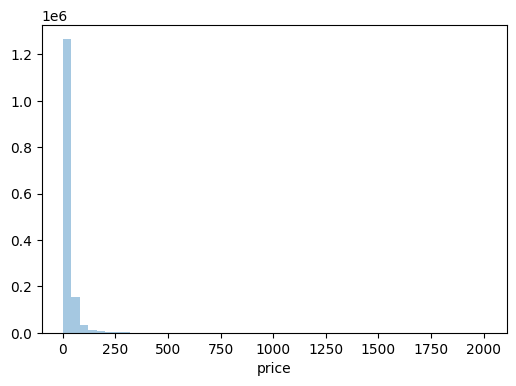

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df=mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

<ipython-input-25-b9b62dbb1352>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

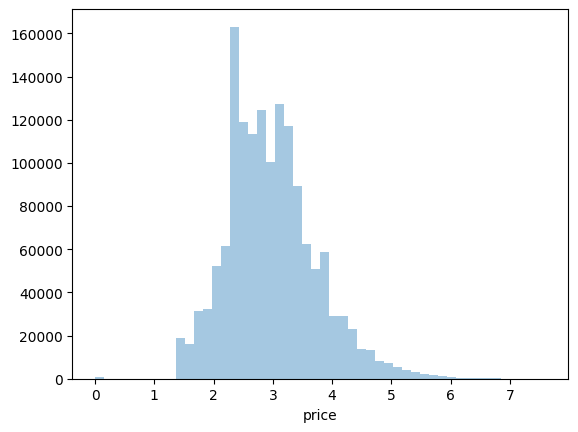

In [25]:
import numpy as np
#로그변환
y_train_df=np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [26]:
mercari_df['price']=np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [27]:
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [28]:
boolean_cond=mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [29]:
#apply lambda 에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
  try:
    return category_name.split('/')
  except:
    return ['Other_Null', 'Other_Null', 'Other_Null'] #대, 중, 소에 모두 other_null 넣기기

#위의 split_cat()을 apply lambda에서 호출해 대, 중,  칼럼을 mercari_df에 생성.
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so']=zip(*mercari_df['category_name'].apply(lambda x:split_cat(x)))


In [30]:
#대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수 :', mercari_df['cat_jung'].unique())
print('소분류 개수 :', mercari_df['cat_so'].unique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수 : ['Tops' 'Computers & Tablets' 'Tops & Blouses' 'Home Décor' 'Jewelry'
 'Other' 'Swimwear' 'Apparel' 'Collectibles' 'Makeup' 'Fragrance'
 'Dresses' 'Office supplies' 'Shoes' 'Gear' 'Athletic Apparel'
 'Cell Phones & Accessories' 'Jeans' 'Underwear' 'Skin Care' 'Toys'
 "Women's Handbags" 'Video Games & Consoles' 'Coats & Jackets' 'Pants'
 'Girls (4+)' 'Antique' 'Kitchen & Dining' 'Sweaters' 'Boys 0-24 Mos'
 'Girls 0-24 Mos' 'Maternity' 'Bedding' 'Exercise' 'Trading Cards'
 'Boys (4+)' 'Storage & Organization' 'Fan Shop' 'Girls 2T-5T'
 "Men's Accessories" 'Boys 2T-5T' "Women's Accessori

In [31]:
mercari_df['brand_name']=mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name']=mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description']=mercari_df['item_description'].fillna(value='Other_Null')

In [32]:
#각 칼럼별로 null값 건수 확인, 모두 0이 나옴
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

2. 피처 인코딩과 피처 벡터화

* 상품 가격을 예측해야 하므로 회귀 모델을 기반으로 함
* 선형 회귀 모델과 회귀 트리 모델을 모두 적용, 특히 선형 회귀의 경우 원-핫 인코딩 적용이 훨씬 선호되므로 인코딩할 피처는 모두 **원-핫 인코딩** 적용
* 피처 벡터화의 경우는 비교적 짧은 텍스트의 경우는 Count 기반의 벡터화를, 긴 텍스트는 TF-IDF 기반의 벡터화 적용

In [33]:
print('brand name의 유형 건수 :', mercari_df['brand_name'].unique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수 : ['Other_Null' 'Razer' 'Target' ... 'Astroglide' 'Cumberland Bay'
 'Kids Only']
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [34]:
print('name의 유형 건수 :', mercari_df['name'].unique())
print('name sample 10건 : \n', mercari_df['name'].value_counts()[:10])

name의 유형 건수 : ['MLB Cincinnati Reds T Shirt Size XL' 'Razer BlackWidow Chroma Keyboard'
 'AVA-VIV Blouse' ... '21 day fix containers and eating plan'
 'World markets lanterns' 'Brand new lux de ville wallet']
name sample 10건 : 
 Bundle                 2232
Reserved                453
Converse                445
BUNDLE                  418
Dress                   410
Coach purse             404
Lularoe TC leggings     396
Romper                  353
Nike                    340
Vans                    334
Name: name, dtype: int64


In [35]:
pd.set_option('max_colwidth', 200)

#item_description의 평균 문자열 크기
print('item_description 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [36]:
#name 속성 피처 벡터화 변환
cnt_vec=CountVectorizer()
X_name=cnt_vec.fit_transform(mercari_df.name)

#item_description 피처 벡터화 변환
tfidf_descp=TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp=tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


In [37]:
from sklearn.preprocessing import LabelBinarizer

#brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name=LabelBinarizer(sparse_output=True)
X_brand=lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id=LabelBinarizer(sparse_output=True)
X_item_cond_id=lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping=LabelBinarizer(sparse_output=True)
X_shipping=lb_shipping.fit_transform(mercari_df['shipping'])

#cat_dae 등 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae=LabelBinarizer(sparse_output=True)
X_cat_dae=lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung=LabelBinarizer(sparse_output=True)
X_cat_jung=lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so=LabelBinarizer(sparse_output=True)
X_cat_so=lb_cat_so.fit_transform(mercari_df['cat_so'])

In [38]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [39]:
from scipy.sparse import hstack
import gc

sparse_matrix_list=(X_name, X_descp, X_brand, X_item_cond_id,
                    X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

#hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse=hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)



<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


In [40]:
#데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제
del X_features_sparse
gc.collect()


0

3. 릿지 회귀 모델 구축 및 평가

In [41]:
def rmsle(y, y_pred):
  #underflow, overflow를 막기 위해 log1p로 rmsle 계산
  return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred),2)))

def evaluate_org_price(y_test, preds):
  #원본 데이터는 log1p 변환되었으므로 expm1으로 원복 필요.
  preds_exmpm=np.expm1(preds)
  y_test_exmpm=np.expm1(y_test)

  #rmsle로 RMSLE 값 추출
  rmsle_result=rmsle(y_test_exmpm, preds_exmpm)
  return rmsle_result

In [42]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
  #scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
  X=hstack(matrix_list).tocsr()

  X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)

  #모델 학습 및 예측
  model.fit(X_train, y_train)
  preds=model.predict(X_test)

  del X, X_train, X_test, y_train
  gc.collect()

  return preds, y_test

In [43]:
linear_model=Ridge(solver='lsqr', fit_intercept=False)

sparse_matrix_list=(X_name, X_brand, X_item_cond_id,
                    X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test=model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('item description을 제외했을 때 rmsle 값 ;', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list=(X_descp, X_name, X_brand, X_item_cond_id,
                    X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test=model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('item description을 포함함했을 때 rmsle 값 ;', evaluate_org_price(y_test, linear_preds))


item description을 제외했을 때 rmsle 값 ; 0.4983990938999374
item description을 포함함했을 때 rmsle 값 ; 0.4680329023962086


LighrGBM 회귀 모델 구축과 앙상블 이용한 최종 예측 평가

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list=(X_descp, X_name, X_brand, X_item_cond_id,
                    X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model=LGBMRegressor(n_estimators=100, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test=model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print('lgbm rmsle 값 ;', evaluate_org_price(y_test, lgbm_preds))


In [ ]:
preds=lgbm_preds*0.45+linear_preds*0.55
print('lgbm과 ridge를 앙상블 한 최종 rmsle 값 :', evaluate_org_price(y_test, preds))